# Easy Scalping Strategy Part I

In [178]:
import pandas as pd
# df = pd.read_csv("BTCUSD_Candlestick_15_M_BID_01.10.2019-24.09.2022.csv")
# df.tail()
import yfinance as yf
import pandas_ta as ta
df = yf.download(tickers = 'BTC-USD', start ="2022-08-05", end = "2022-09-25", interval ='15m')
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2022-08-05 07:00:00+00:00,23260.078125,23272.431641,23220.652344,23220.652344,23220.652344,28635136
2022-08-05 07:15:00+00:00,23219.054688,23219.054688,23199.087891,23202.558594,23202.558594,84566016
2022-08-05 07:30:00+00:00,23200.867188,23201.210938,23192.371094,23197.824219,23197.824219,42147840
2022-08-05 07:45:00+00:00,23199.587891,23199.587891,23183.882812,23192.029297,23192.029297,18864128
2022-08-05 08:00:00+00:00,23191.335938,23238.505859,23191.335938,23238.505859,23238.505859,22837248


In [179]:
df=df[df['Volume']!=0]
df.isna().sum()
#df.reset_index(drop=True, inplace=True)
df.reset_index(inplace=True)
df.tail()

,Datetime,Open,High,Low,Close,Adj Close,Volume
3474,2022-09-25 03:00:00+00:00,18954.574219,18979.701172,18946.724609,18979.701172,18979.701172,37005312
3475,2022-09-25 03:15:00+00:00,18980.886719,19022.964844,18980.195312,19018.869141,19018.869141,82649088
3476,2022-09-25 03:30:00+00:00,19018.773438,19029.095703,19018.773438,19029.095703,19029.095703,11053056
3477,2022-09-25 05:30:00+00:00,18962.343750,18990.621094,18961.710938,18990.621094,18990.621094,16171008
3478,2022-09-25 06:15:00+00:00,19006.208984,19045.345703,19006.208984,19041.537109,19041.537109,7813120


In [180]:
import pandas_ta as ta
df["EMA50"] = ta.ema(df.Close, length=50)
df["EMA100"] = ta.ema(df.Close, length=100)
df["EMA150"] = ta.ema(df.Close, length=150)

C:\Users\deerr\anaconda3\envs\dev\envs\dev\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\deerr\anaconda3\envs\dev\envs\dev\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\deerr\anaconda3\envs\dev\envs\dev\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [181]:
backrollingN = 10
df['slopeEMA50'] = df['EMA50'].diff(periods=1)
df['slopeEMA50'] = df['slopeEMA50'].rolling(window=backrollingN).mean()

df['slopeEMA100'] = df['EMA100'].diff(periods=1)
df['slopeEMA100'] = df['slopeEMA100'].rolling(window=backrollingN).mean()

df['slopeEMA150'] = df['EMA150'].diff(periods=1)
df['slopeEMA150'] = df['slopeEMA150'].rolling(window=backrollingN).mean()

C:\Users\deerr\anaconda3\envs\dev\envs\dev\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\deerr\anaconda3\envs\dev\envs\dev\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\deerr\anaconda3\envs\dev\envs\dev\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [182]:
df.tail()

,Datetime,Open,High,Low,Close,Adj Close,Volume,EMA50,EMA100,EMA150,slopeEMA50,slopeEMA100,slopeEMA150
3474,2022-09-25 03:00:00+00:00,18954.574219,18979.701172,18946.724609,18979.701172,18979.701172,37005312,19037.828071,19033.268677,19032.011981,-3.563568,-1.482755,-0.932487
3475,2022-09-25 03:15:00+00:00,18980.886719,19022.964844,18980.195312,19018.869141,19018.869141,82649088,19037.084584,19032.983538,19031.837903,-3.886604,-1.687076,-1.076440
3476,2022-09-25 03:30:00+00:00,19018.773438,19029.095703,19018.773438,19029.095703,19029.095703,11053056,19036.771294,19032.906551,19031.801583,-3.396313,-1.483058,-0.948066
3477,2022-09-25 05:30:00+00:00,18962.343750,18990.621094,18961.710938,18990.621094,18990.621094,16171008,19034.961483,19032.069215,19031.256146,-3.257939,-1.451073,-0.933758
3478,2022-09-25 06:15:00+00:00,19006.208984,19045.345703,19006.208984,19041.537109,19041.537109,7813120,19035.219350,19032.256698,19031.392318,-2.587529,-1.148329,-0.738112


## EMA Signal

In [183]:
import numpy as np
conditions = [
    ( (df['EMA50']<df['EMA100']) & (df['EMA100']<df['EMA150']) & (df['slopeEMA50']<0) & (df['slopeEMA100']<0) & (df['slopeEMA150']<0) ),   #downtrend =1
    ( (df['EMA50']>df['EMA100']) & (df['EMA100']>df['EMA150']) & (df['slopeEMA50']>0) & (df['slopeEMA100']>0) & (df['slopeEMA150']>0) )    #uptrend = 2
           ]
choices = [1, 2]
df['EMAsignal'] = np.select(conditions, choices, default=0)

C:\Users\deerr\anaconda3\envs\dev\envs\dev\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [184]:
df.tail()

,Datetime,Open,High,Low,Close,Adj Close,Volume,EMA50,EMA100,EMA150,slopeEMA50,slopeEMA100,slopeEMA150,EMAsignal
3474,2022-09-25 03:00:00+00:00,18954.574219,18979.701172,18946.724609,18979.701172,18979.701172,37005312,19037.828071,19033.268677,19032.011981,-3.563568,-1.482755,-0.932487,0
3475,2022-09-25 03:15:00+00:00,18980.886719,19022.964844,18980.195312,19018.869141,19018.869141,82649088,19037.084584,19032.983538,19031.837903,-3.886604,-1.687076,-1.076440,0
3476,2022-09-25 03:30:00+00:00,19018.773438,19029.095703,19018.773438,19029.095703,19029.095703,11053056,19036.771294,19032.906551,19031.801583,-3.396313,-1.483058,-0.948066,0
3477,2022-09-25 05:30:00+00:00,18962.343750,18990.621094,18961.710938,18990.621094,18990.621094,16171008,19034.961483,19032.069215,19031.256146,-3.257939,-1.451073,-0.933758,0
3478,2022-09-25 06:15:00+00:00,19006.208984,19045.345703,19006.208984,19041.537109,19041.537109,7813120,19035.219350,19032.256698,19031.392318,-2.587529,-1.148329,-0.738112,0


## Total signal

In [185]:
TotSignal = [0] * len(df)
for row in range(0, len(df)):
    TotSignal[row] = 0
    if df.EMAsignal[row]==1 and df.Open[row]>df.EMA50[row] and df.Close[row]<df.EMA50[row]:
        TotSignal[row]=1 #signal to short the ticker
    if df.EMAsignal[row]==2 and df.Open[row]<df.EMA50[row] and df.Close[row]>df.EMA50[row]:
        TotSignal[row]=2 #signal to long the ticker

df['TotSignal']=TotSignal

C:\Users\deerr\anaconda3\envs\dev\envs\dev\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [186]:
df.tail()

,Datetime,Open,High,Low,Close,Adj Close,Volume,EMA50,EMA100,EMA150,slopeEMA50,slopeEMA100,slopeEMA150,EMAsignal,TotSignal
3474,2022-09-25 03:00:00+00:00,18954.574219,18979.701172,18946.724609,18979.701172,18979.701172,37005312,19037.828071,19033.268677,19032.011981,-3.563568,-1.482755,-0.932487,0,0
3475,2022-09-25 03:15:00+00:00,18980.886719,19022.964844,18980.195312,19018.869141,19018.869141,82649088,19037.084584,19032.983538,19031.837903,-3.886604,-1.687076,-1.076440,0,0
3476,2022-09-25 03:30:00+00:00,19018.773438,19029.095703,19018.773438,19029.095703,19029.095703,11053056,19036.771294,19032.906551,19031.801583,-3.396313,-1.483058,-0.948066,0,0
3477,2022-09-25 05:30:00+00:00,18962.343750,18990.621094,18961.710938,18990.621094,18990.621094,16171008,19034.961483,19032.069215,19031.256146,-3.257939,-1.451073,-0.933758,0,0
3478,2022-09-25 06:15:00+00:00,19006.208984,19045.345703,19006.208984,19041.537109,19041.537109,7813120,19035.219350,19032.256698,19031.392318,-2.587529,-1.148329,-0.738112,0,0


In [187]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

C:\Users\deerr\anaconda3\envs\dev\envs\dev\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [188]:
df["TotSignal"].value_counts()

0    3281
1      21
2      18
Name: TotSignal, dtype: int64

## Visualizing signals on chart

In [189]:
def pointpos(x):
    if x['TotSignal']==1:
        return x['High']+1e-3
    elif x['TotSignal']==2:
        return x['Low']-1e-3
    else:
        return np.nan

df['pointpos'] = df.apply(lambda row: pointpos(row), axis=1)

C:\Users\deerr\anaconda3\envs\dev\envs\dev\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



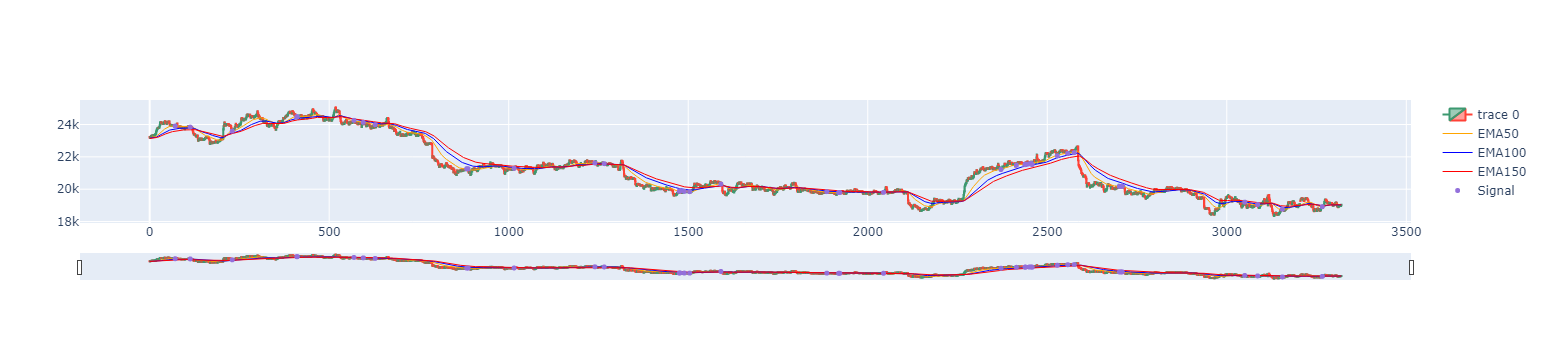

In [190]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from datetime import datetime
dfpl = df[:]
#100:350
fig = go.Figure(data=[go.Candlestick(x=dfpl.index,
                open=dfpl['Open'],
                high=dfpl['High'],
                low=dfpl['Low'],
                close=dfpl['Close']),
                go.Scatter(x=dfpl.index, y=dfpl.EMA50, line=dict(color='orange', width=1), name="EMA50"),
                go.Scatter(x=dfpl.index, y=dfpl.EMA100, line=dict(color='blue', width=1), name="EMA100"),
                go.Scatter(x=dfpl.index, y=dfpl.EMA150, line=dict(color='red', width=1), name="EMA150")])

fig.add_scatter(x=dfpl.index, y=dfpl['pointpos'], mode="markers",
                marker=dict(size=5, color="MediumPurple"),
                name="Signal")
fig.show()

In [191]:
dfpl

,Datetime,Open,High,Low,Close,Adj Close,Volume,EMA50,EMA100,EMA150,slopeEMA50,slopeEMA100,slopeEMA150,EMAsignal,TotSignal,pointpos
0,2022-08-08 01:30:00+00:00,23221.558594,23221.558594,23191.837891,23191.837891,23191.837891,7590912,23189.978288,23160.321973,23134.198663,1.238049,1.202012,1.144296,2,0,NaN
1,2022-08-08 01:45:00+00:00,23197.044922,23205.792969,23192.767578,23205.792969,23205.792969,29271040,23190.598471,23161.222389,23135.146932,1.031639,1.098499,1.075823,2,0,NaN
2,2022-08-08 02:00:00+00:00,23212.382812,23233.781250,23212.382812,23233.781250,23233.781250,14260224,23192.291914,23162.659198,23136.453347,1.194530,1.179426,1.130254,2,0,NaN
3,2022-08-08 02:15:00+00:00,23255.480469,23255.480469,23235.703125,23248.949219,23248.949219,46085120,23194.513769,23164.367911,23137.943359,1.635492,1.402390,1.280040,2,0,NaN
4,2022-08-08 02:30:00+00:00,23247.888672,23295.375000,23243.501953,23292.875000,23292.875000,77215744,23198.371072,23166.912606,23139.995433,2.025353,1.603866,1.416423,2,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3315,2022-09-25 03:00:00+00:00,18954.574219,18979.701172,18946.724609,18979.701172,18979.701172,37005312,19037.828071,19033.268677,19032.011981,-3.563568,-1.482755,-0.932487,0,0,NaN
3316,2022-09-25 03:15:00+00:00,18980.886719,19022.964844,18980.195312,19018.869141,19018.869141,82649088,19037.084584,19032.983538,19031.837903,-3.886604,-1.687076,-1.076440,0,0,NaN
3317,2022-09-25 03:30:00+00:00,19018.773438,19029.095703,19018.773438,19029.095703,19029.095703,11053056,19036.771294,19032.906551,19031.801583,-3.396313,-1.483058,-0.948066,0,0,NaN
3318,2022-09-25 05:30:00+00:00,18962.343750,18990.621094,18961.710938,18990.621094,18990.621094,16171008,19034.961483,19032.069215,19031.256146,-3.257939,-1.451073,-0.933758,0,0,NaN


In [192]:
dfpl.TotSignal.value_counts()

0    3281
1      21
2      18
Name: TotSignal, dtype: int64

## Backtesting Strategy

In [193]:
def SIGNAL():
    return dfpl.TotSignal

In [194]:
from backtesting import Strategy
class MyStrat(Strategy):
    initsize = 0.3
    mysize = initsize
    def init(self):
        super().init()
        self.signal1 = self.I(SIGNAL)

    def next(self):
        super().next()
        
        #if(self.signal1>0 and len(self.trades)==0 and len(self.closed_trades)>0 and self.closed_trades[-1].pl < 0):
        #    self.mysize=self.mysize*2
        #elif len(self.closed_trades)>0 and self.closed_trades[-1].pl > 0:
        #    self.mysize=self.initsize

        if self.signal1==2 and len(self.trades)==0:   
            sl1 = self.data.Close[-1] - 200000e-4
            tp1 = self.data.Close[-1] + 400000e-4
            self.buy(sl=sl1, tp=tp1, size=self.mysize)
        
        elif self.signal1==1 and len(self.trades)==0:         
            sl1 = self.data.Close[-1] + 200000e-4
            tp1 = self.data.Close[-1] - 400000e-4
            self.sell(sl=sl1, tp=tp1, size=self.mysize)

In [199]:
from backtesting import Backtest

bt = Backtest(dfpl, MyStrat, cash=1000000, margin=1/100, commission=.00003)
stat = bt.run()
stat

C:\Users\deerr\anaconda3\envs\dev\envs\dev\lib\site-packages\ipykernel_launcher.py:3: UserWarning:

Data index is not datetime. Assuming simple periods, but `pd.DateTimeIndex` is advised.



Start                                     0.0
End                                    3319.0
Duration                               3319.0
Exposure Time [%]                    2.108434
Equity Final [$]               1244528.064845
Equity Peak [$]                1245649.178566
Return [%]                          24.452806
Buy & Hold Return [%]              -17.895523
Return (Ann.) [%]                         0.0
Volatility (Ann.) [%]                     NaN
Sharpe Ratio                              NaN
Sortino Ratio                             NaN
Calmar Ratio                              0.0
Max. Drawdown [%]                  -11.958512
Avg. Drawdown [%]                   -6.001999
Max. Drawdown Duration                 1853.0
Avg. Drawdown Duration             453.833333
# Trades                                 37.0
Win Rate [%]                        43.243243
Best Trade [%]                       0.241119
Worst Trade [%]                     -0.308037
Avg. Trade [%]                    

In [196]:
bt.plot()

Row(id='8139', ...)